<a href="https://colab.research.google.com/github/gabriellycristine1/Projetos_e_Atividades_Python/blob/main/Projeto_MAMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

In [ ]:
dadosMAMA = pd.read_csv('/content/data.csv')
dadosMAMA

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
grafico = px.scatter_matrix(dadosMAMA, dimensions = ['radius_mean', 'texture_mean', 'perimeter_mean'])
grafico1 = px.scatter_matrix(dadosMAMA, dimensions = ['area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean'])
grafico2 = px.scatter_matrix(dadosMAMA, dimensions = ['concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])
grafico3 = px.scatter_matrix(dadosMAMA, dimensions = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se'])
grafico4 = px.scatter_matrix(dadosMAMA, dimensions = ['compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se'])
grafico5 = px.scatter_matrix(dadosMAMA, dimensions = ['fractal_dimension_se', 'radius_worst', 'texture_worst'])
grafico6 = px.scatter_matrix(dadosMAMA, dimensions = ['perimeter_worst', 'area_worst', 'smoothness_worst'])
grafico7 = px.scatter_matrix(dadosMAMA, dimensions = ['compactness_worst', 'concavity_worst', 'concave points_worst'])
grafico8 = px.scatter_matrix(dadosMAMA, dimensions = ['symmetry_worst', 'fractal_dimension_worst'])
grafico

In [ ]:
fil1 = dadosMAMA.loc[dadosMAMA['texture_mean'] > 33.81]
fil1['texture_mean'] = 19.289649	
#########################################
fil2 = dadosMAMA.loc[dadosMAMA['area_mean'] > 1878]
fil2['area_mean'] = 654.889104
#########################################
fil3 = dadosMAMA.loc[dadosMAMA['smoothness_mean'] > 0.1447]
fil3['smoothness_mean'] = 0.096360
###################################
fil4 = dadosMAMA.loc[dadosMAMA['compactness_mean'] > 0.2867]
fil4['compactness_mean'] = 0.104341
##################################
fil5 = dadosMAMA.loc[dadosMAMA['symmetry_mean'] > 0.2743]
fil5['symmetry_mean'] = 0.181162
##################################
fil6 = dadosMAMA.loc[dadosMAMA['radius_se'] > 1.509]
fil6['radius_se'] = 0.405172
########################################
fil7 = dadosMAMA.loc[dadosMAMA['texture_se'] > 3.896]
fil7['texture_se'] = 1.2168534270650264
###################################
fil8 = dadosMAMA.loc[dadosMAMA['perimeter_se'] > 11.07]
fil8['perimeter_se'] = 2.8660592267135327
##########################################
fil9 = dadosMAMA.loc[dadosMAMA['area_se'] > 233]
fil9['area_se'] = 40.337079086116
########################################
fil10 = dadosMAMA.loc[dadosMAMA['smoothness_se'] > 0.02333]
fil10['smoothness_se'] = 0.007040978910369069
###########################################
fil11 = dadosMAMA.loc[dadosMAMA['compactness_se'] > 0.1064]
fil11['compactness_se'] = 0.025478138840070295
###########################################
fil12 = dadosMAMA.loc[dadosMAMA['concavity_se'] > 0.1535]
fil12['concavity_se' ] = 0.03189371634446397
##################################################
fil13 = dadosMAMA.loc[dadosMAMA['concave points_se'] >  0.0409]
fil13['concave_points_se'] = 0.048919	
#############################################
fil14 = dadosMAMA.loc[dadosMAMA['symmetry_se'] > 0.06146]
fil14['symmetry_se'] = 0.02054229876977153
############################################
fil15 = dadosMAMA.loc[dadosMAMA['fractal_dimension_se'] >  0.01298]
fil15['fractal_dimension_se' ] = 0.0037949038664323374
#####################################################
fil16 = dadosMAMA.loc[dadosMAMA['area_worst'] >  229.3]
fil16['area_worst'] = 880.5831282952548
#######################################
fil17 = dadosMAMA.loc[dadosMAMA['concavity_worst'] > 0.9608]
fil17['concavity_worst'] = 0.272188	
#######################################
fil18 = dadosMAMA.loc[dadosMAMA['symmetry_worst'] >  0.5774]
fil18['symmetry_worst'] = 0.290076	
#####################################
fil19 = dadosMAMA.loc[dadosMAMA['fractal_dimension_worst'] > 0.1486]
fil19['fractal_dimension_worst'] = 0.083946


In [ ]:
ultima_coluna = dadosMAMA.pop('diagnosis')

In [ ]:
dadosMAMA.insert(32,'diagnosis',ultima_coluna)

In [ ]:
dadosMAMA.drop(columns='Unnamed: 32',inplace=True)

In [ ]:
x = dadosMAMA['fractal_dimension_worst'].unique()
print(len(x))

535


In [ ]:
dadosMAMA

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [ ]:
x_dados_mama = dadosMAMA.iloc[:,0:31].values
x_dados_mama


array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 1.9690000e+01, 2.1250000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 1.6600000e+01, 2.8080000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 2.0600000e+01, 2.9330000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 7.7600000e+00, 2.4540000e+01, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

In [ ]:
y_dados_mama = dadosMAMA.iloc[:,31].values
y_dados_mama

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
label_encoder_diagnosis = LabelEncoder()


In [ ]:
y_dados_mama[:] = label_encoder_diagnosis.fit_transform(y_dados_mama[:])

In [ ]:
y_dados_mama

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
x_dados_mama

array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 1.9690000e+01, 2.1250000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 1.6600000e+01, 2.8080000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 2.0600000e+01, 2.9330000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 7.7600000e+00, 2.4540000e+01, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_mama_treinamento, X_mama_teste, Y_mama_treinamento, Y_mama_teste = train_test_split(x_dados_mama, y_dados_mama)

In [ ]:
with open('/content/data.pkl', 'wb') as f:
  pickle.dump([X_mama_treinamento,Y_mama_treinamento,X_mama_teste, Y_mama_teste],f)

In [ ]:
X_mama_treinamento.shape, X_mama_teste.shape

((426, 31), (143, 31))

In [ ]:
Y_mama_treinamento = Y_mama_treinamento.astype('int')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [ ]:
# parametros = {
#     'activation':['relu','logistic', 'tanh'],
#     'solver': ['adam','sgd'],
#     'batch_size':[10,5,3,2],
#     'tol':[0.001,0.01]
# }


In [ ]:
# grid_search = GridSearchCV(estimator =  MLPClassifier(), param_grid= parametros)
# grid_search.fit(x_mama_con, y_mama_con)
# melhores_parametros = grid_search.best_params_
# melhor_resultado = grid_search.best_score_
# print(melhor_resultado)
# print(melhores_parametros)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
rede_neural_mama = MLPClassifier(activation = 'relu', batch_size = 10, solver= 'adam', tol=0.001,max_iter=500,learning_rate_init= 0.005,n_iter_no_change=20)
rede_neural_mama.fit(X_mama_treinamento, Y_mama_treinamento)

MLPClassifier(batch_size=10, learning_rate_init=0.005, max_iter=500,
              n_iter_no_change=20, tol=0.001)

In [ ]:
# resultado_redes_neurais = []
# for i in range(4):
#  kfold = KFold(n_splits=10,shuffle=True,random_state = i)
#  rede_neural_mama = MLPClassifier(activation = 'relu', batch_size = 10, solver= 'adam', tol=0.001,max_iter=240)
#  scores = cross_val_score(rede_neural_mama,x_mama_con, y_mama_con, cv=kfold)
#  print(scores)
#  print(scores.mean())
#  resultado_redes_neurais.append(scores.mean())

In [ ]:
previsoes = rede_neural_mama.predict(X_mama_teste)
previsoes 


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
Y_mama_teste

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
Y_mama_teste = Y_mama_teste.astype('int')

In [ ]:
accuracy_score(Y_mama_teste,previsoes)

0.7412587412587412

In [ ]:
pickle.dump(rede_neural_mama,open('redes_finalizadasTOTAL.sav','wb'))

In [ ]:
rede_neural = pickle.load(open('/content/redes_finalizadasTOTAL.sav','rb'))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.7412587412587412

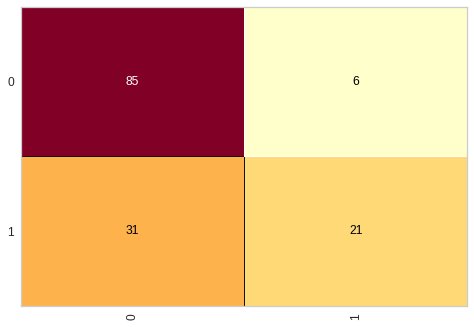

In [ ]:
cm = ConfusionMatrix(rede_neural_mama)
cm.fit(X_mama_teste, Y_mama_teste)
cm.score(X_mama_teste, Y_mama_teste)

In [ ]:
rede_neural_mama = pickle.load(open('/content/redes_finalizadasTOTAL.sav','rb'))

In [ ]:
print('    =================INSIRA OS DADOS DA PACIENTE===============')
Id = input('               Insira o id do paciente: ')
print('    ===========================================================')
radius_mean = input('    insira o raio medio da mama:  ')
print('    ===========================================================')
texture_mean = input('    Insira a textura media da mama: ')
print('    ===========================================================')
perimeter_mean = input('    Insira o perimetro medio da mama: ')
print('    ===========================================================')
area_mean = input('    Insira a area media da mama: ')
print('    ===========================================================')
smoothness_mean = input('    Insira a suavidade media da mama: ')
print('    ===========================================================')
compactness_mean = input('    Insira a compacidade media da mama: ')
print('    ===========================================================')
concavity_mean = input('    Insira a concavidade media da mama: ')
print('    ===========================================================')
concave_points_mean = input('    Insira a media dos pontos concavos: ')
print('    ===========================================================')
symmetry_mean = input('    Insira a simetria media da mama: ')
print('    ===========================================================')
fractal_dimension_mean = input('    insira a media da Dimensao fractal: ')
print('    ===========================================================')
radius_se = input('    Insira o raio Se: ')
print('    ===========================================================')
texture_se = input('    Insira a textura Se: ')
print('    ===========================================================')
perimeter_se = input('    Insira o perimetro Se: ')
print('    ===========================================================')
area_se = input('    Insira a area se: ')
print('    ===========================================================')
smoothness_se = input('    Insira a suavidade: ')
print('    ===========================================================')
compactness_se = input('    Insira a compacidade')
print('    ===========================================================')
concavity_se = input('    Insira a concavidade: ')
print('    ===========================================================')
concave_points_se = input('    Insira os pontos concavos')
print('    ===========================================================')
symmetry_se = input('    Insira a simetria: ')
print('    ===========================================================')
fractal_dimension_se = input('    Insira a dimensao fractal: ')
print('    ===========================================================')
radius_worst = input('    Insira o pior raio: ')
print('    ===========================================================')
texture_worst = input('    Insira a pior textura: ')
print('    ===========================================================')
perimeter_worst = input('    Insira o pior perimetro: ')
print('    ===========================================================')
area_worst = input('    Insira a pior area: ')
print('    ===========================================================')
smoothness_worst = input('    Insira a pior suavidade: ')
print('    ===========================================================')
compactness_worst = input('    Insira a pior compacidade: ')
print('    ===========================================================')
concavity_worst = input('    Insira a pior Concavidade: ')
print('    ===========================================================')
concave_points_worst = input('    Insira os piores pontos concavos: ')
print('    ===========================================================')
symmetry_worst = input('    Insira a pior simetria: ')
print('    ===========================================================')
fractal_dimension_worst = input('  Insira a pior dimensao fractal:')
print('  ===========================================================')

previsoes = rede_neural_mama.predict([[Id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,
                                       symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,
                                       concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,
                                       smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,
  ]])
print('\033[1;105m\033[1;30m\033[;1m=======RESULTADO DO EXAME===========')
print('0 - BENIGNO 1-MALIGNO')
print(previsoes)